In [1]:
#importing libraries
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv(r'diabetes.csv')

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,1,85,66,29,0,26.6,0.351,31,neg
2,8,183,64,0,0,23.3,0.672,32,pos
3,1,89,66,23,94,28.1,0.167,21,neg
4,0,137,40,35,168,43.1,2.288,33,pos


In [4]:
dataset.shape

(768, 9)

In [5]:
#checking null values
dataset.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Diabetes                    False
dtype: bool

In [6]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes                    0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['Diabetes']=le.fit_transform(dataset['Diabetes'])

In [8]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
#Independt and dependent
x = dataset.iloc[:,0:8].values

In [10]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [11]:
#dependent variable
y = dataset.iloc[:,8:9].values

In [12]:
y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [24]:
from joblib import dump
dump(sc,'transform.save')

['transform.save']

In [16]:
x_train

array([[ 0.90832902,  0.91569367,  0.44912368, ...,  0.37852648,
         0.67740401,  1.69955804],
       [ 0.03644676, -0.75182191, -0.47230103, ..., -0.50667229,
        -0.07049698, -0.96569189],
       [-1.12606292,  1.38763205,  1.06340683, ...,  2.54094063,
        -0.11855487, -0.88240283],
       ...,
       [ 0.03644676, -0.84620959, -0.21634972, ..., -0.94927168,
        -0.95656442, -1.04898095],
       [ 2.0708387 , -1.12937261,  0.24436264, ..., -0.26640405,
        -0.50001442,  0.11706589],
       [ 0.32707418,  0.47521786,  0.65388473, ..., -4.07275877,
         0.52121586,  2.94889395]])

### SVM

In [17]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)

C:\Users\smartbridge\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
y_pred_svm = svm.predict(x_test)

In [19]:
y_pred_svm

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [21]:
acc_svm = accuracy_score(y_test,y_pred_svm)
acc_svm

0.8116883116883117

In [22]:
cm_svm = confusion_matrix(y_test,y_pred_svm)
cm_svm

array([[96, 11],
       [18, 29]], dtype=int64)

Text(0, 0.5, 'tpr')

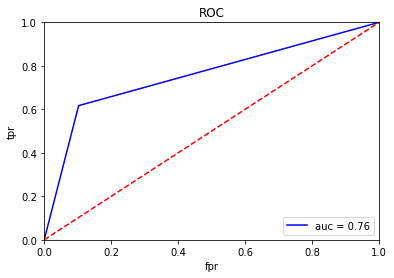

In [23]:
import sklearn.metrics as metrics
fpr3,tpr3,threshold = metrics.roc_curve(y_test,y_pred_svm)
roc_auc_svm = metrics.auc(fpr3,tpr3)

import matplotlib.pyplot as plt
plt.title("ROC")
plt.plot(fpr3,tpr3,'b',label = 'auc = %0.2f'%roc_auc_svm)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('fpr')
plt.ylabel('tpr')

In [25]:
dump(svm,'svm.save')

['svm.save']